In [2]:
import torch
import torch.nn.functional as F
import json
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

Duplicate key in file PosixPath('/home/miskai/.pyenv/versions/miniconda3-latest/envs/sgg-td/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'), line 257 ('font.family:  sans-serif')


In [3]:
from tqdm import tqdm

In [1]:
from scipy.cluster import hierarchy

In [4]:
project_dir = '/home/miskai/デスクトップ/related-work/scene-graph-benchmark'
image_file = json.load(open(f'{project_dir}/datasets/vg/image_data.json'))
vocab_file = json.load(open(f'{project_dir}/datasets/vg/VG-SGG-dicts-with-attri.json'))
data_file = h5py.File(f'{project_dir}/datasets/vg/VG-SGG-with-attri.h5', 'r')
# remove invalid image
corrupted_ims = [1592, 1722, 4616, 4617]
tmp = []
for item in image_file:
    if int(item['image_id']) not in corrupted_ims:
        tmp.append(item)
image_file = tmp

In [5]:
idx2pred = vocab_file["idx_to_predicate"]
pred_cnt = vocab_file["predicate_count"]

# Visual tree

In [6]:
labels = np.array([idx2pred[str(l)] for l in range(1,51)], dtype=str)

## data from npy file

In [9]:
vis_info_path = "../datasets/vg/initial_feature/predcls/feat.npy"

In [10]:
vis_info = np.load(vis_info_path, allow_pickle=True).item()

In [11]:
vis_info.keys()

dict_keys(['avg_feature'])

In [12]:
data = vis_info["avg_feature"][1:]
data

array([[ 8.78182370e-02,  8.37645540e-02,  1.22660679e-01, ...,
        -6.90760710e+00, -6.90774453e+00, -6.90748296e+00],
       [ 1.47392768e-01,  1.16908082e-01,  6.74765523e-02, ...,
        -6.90774003e+00, -6.90773139e+00, -6.90771599e+00],
       [ 2.08611857e-01,  1.00765036e-10,  8.63715186e-02, ...,
        -6.90770969e+00, -6.90774153e+00, -6.89034438e+00],
       ...,
       [ 1.87102243e-01,  1.31770892e-01,  3.74616326e-02, ...,
        -1.37563402e+00, -3.75640813e+00, -4.76339705e+00],
       [ 1.21486080e-01,  7.38199728e-02,  1.60430993e-01, ...,
        -3.31000451e+00, -4.38970869e+00, -5.15966807e+00],
       [ 1.27609288e-02,  2.47284138e-01,  5.18179847e-01, ...,
        -6.90022588e+00, -6.90055833e+00, -4.38379713e+00]])

## Hierarchical Clustering

In [13]:
z = hierarchy.linkage(data, method="ward", metric="euclidean")
# z = hierarchy.linkage(combined_vis_info["freq_ave"], method="ward", metric="euclidean")

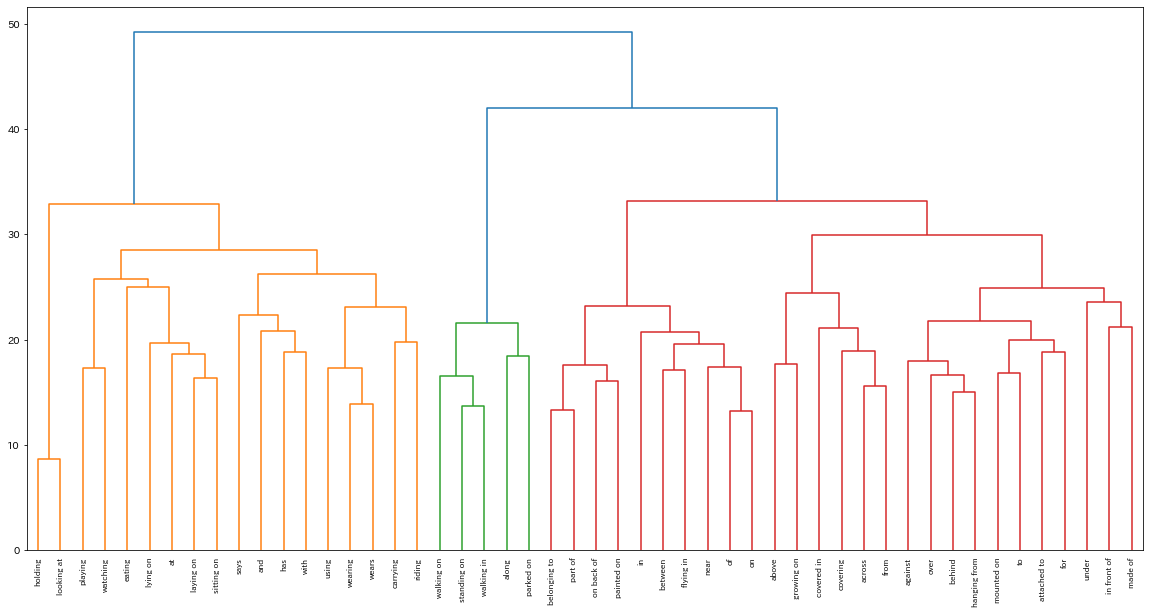

In [14]:
plt.figure(figsize=(20,10))
ax = hierarchy.dendrogram(z, show_contracted=True, labels=labels)
# plt.savefig("./feat-basic-cls.png", dpi=300, bbox_inches="tight")

In [15]:
cls = hierarchy.fcluster(z, t=2, criterion="maxclust")
len(set(cls))

2

In [16]:
labels = np.array(labels, dtype=str)
for i in range(1,len(set(cls))+1):
    print(labels[cls==i])
    cnt = 0
    for l in labels[cls==i]:
        cnt += pred_cnt[l]
    print(cnt)

['and' 'at' 'carrying' 'eating' 'has' 'holding' 'laying on' 'looking at'
 'lying on' 'playing' 'riding' 'says' 'sitting on' 'using' 'watching'
 'wearing' 'wears' 'with']
609576
['above' 'across' 'against' 'along' 'attached to' 'behind' 'belonging to'
 'between' 'covered in' 'covering' 'flying in' 'for' 'from' 'growing on'
 'hanging from' 'in' 'in front of' 'made of' 'mounted on' 'near' 'of' 'on'
 'on back of' 'over' 'painted on' 'parked on' 'part of' 'standing on' 'to'
 'under' 'walking in' 'walking on']
1436430
